<a href="https://colab.research.google.com/github/renyuanL/110_project/blob/main/_ry_From%20regression%20to%20RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## From Regression to RNN

Learning objectives:
* [Objective 1] ARIMA
* [Objective 2] RNN requires a 3-D tensor as input
* [Objective 3] Stock data
* [Objective 4] Create the training and test data for RNN/LSTM
* [Objective 5] Run a simple RNN model
* [Objective 6] RNN/LTSM requires normalized input data
* [Objective 7] LSTM
* [Objective 8] LSTM Regularization
* [Objective 9] GRU
* [Objective 10] GRU Regularization

Note: Every run of the following code may vary.

## Ref:
- https://medium.com/swlh/a-technical-guide-on-rnn-lstm-gru-for-stock-price-prediction-bce2f7f30346

- https://github.com/dataman-git/codes_for_articles/blob/master/From%20regression%20to%20RNN.ipynb


In [1]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import pacf
from statsmodels.regression.linear_model import yule_walker
#from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### [Learning Objective 1] ARIMA()

In [2]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

from statsmodels.tsa.arima_process import ArmaProcess

from statsmodels.tsa.stattools import pacf
from statsmodels.regression.linear_model import yule_walker
#from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

# Generate the data
import numpy as np

np.random.seed(0)

ar= np.array([1, -0.8, 0.2])
ma= np.array([1])
my_simulation= ArmaProcess(ar, ma).generate_sample(nsample=100)

'''
plt.figure(figsize=[10, 5]); # Set dimensions for figure
plt.plot(my_simulation, linestyle='-', marker='o', color='b')
plt.title("Simulated Process")
plt.show()
'''
my_simulation


array([ 1.76405235,  1.81139909,  2.07504678,  3.53865081,  4.28346928,
        1.74176738,  1.48680847,  0.68973609,  0.15120833,  0.39361794,
        0.42869626,  1.71850693,  2.05010401,  1.41805684,  1.1682879 ,
        0.98469328,  2.04817612,  1.23644397,  0.89258766, -0.38731441,
       -3.04135887, -1.70200562,  0.11110348, -0.31288112,  1.99722904,
        0.20599378, -0.18889227, -0.37949642,  1.26696053,  2.55882648,
        1.9486165 ,  1.42529043, -0.13727671, -2.37567592, -2.22099754,
       -1.14531388,  0.75823908,  2.03803389,  1.09145248,  0.16325245,
       -1.1362415 , -2.36166163, -3.36835119, -0.27157323, -0.05324053,
       -0.42635208, -1.58322892, -0.40382236, -1.62030995, -1.42822377,
       -1.71398359, -0.69863962, -0.72692011, -1.62244035, -1.18075049,
       -0.19178045,  0.14924296,  0.46022236, -0.2959928 , -0.69157988,
       -1.16652579, -1.15445782, -1.50340738, -2.69811694, -1.68038594,
       -1.2064663 , -2.2592942 , -1.10335984, -1.3381274 , -0.79

In [3]:
#ArmaProcess??

The ARMA(p,q) process is described by

.. math::

$
        y_{t}=\phi_{1}y_{t-1}+\ldots+\phi_{p}y_{t-p}+\theta_{1}\epsilon_{t-1}
               +\ldots+\theta_{q}\epsilon_{t-q}+\epsilon_{t}
$

and the parameterization used in this function uses the lag-polynomial
    representation,

.. math::

$
        \left(1-\phi_{1}L-\ldots-\phi_{p}L^{p}\right)y_{t} =
            \left(1-\theta_{1}L-\ldots-\theta_{q}L^{q}\right)
$

### ry: 上面這式子(from官方文件)怪怪的，修改一下...

$
        \left(1-\phi_{1}L-\ldots-\phi_{p}L^{p}\right)y_{t} =
            \left(1+\theta_{1}L+\ldots+\theta_{q}L^{q}\right)\epsilon_{t}
$

(count    100.000000
 mean       0.138111
 std        1.510065
 min       -3.368351
 25%       -1.138510
 50%        0.075776
 75%        1.356861
 max        4.283469
 dtype: float64, <matplotlib.axes._subplots.AxesSubplot at 0x7fbee35e85d0>)

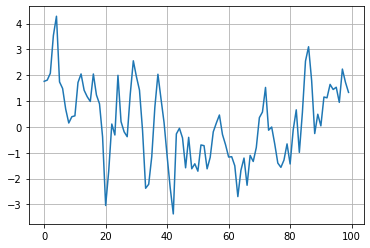

In [4]:
x= pd.Series(my_simulation)
x.describe(), x.plot(grid=True)

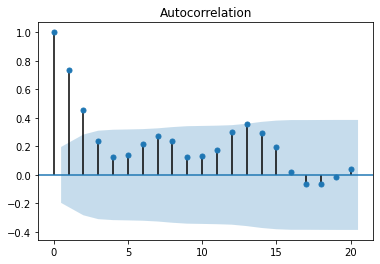

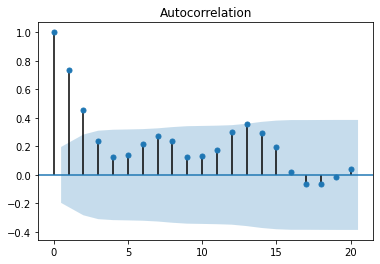

In [5]:
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
plot_acf(my_simulation)

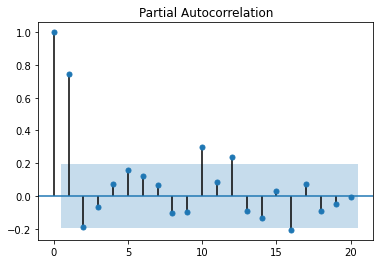

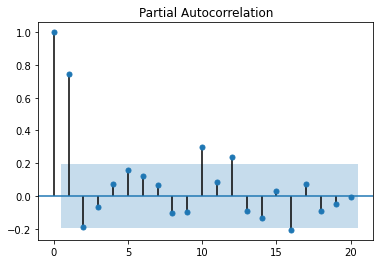

In [6]:
plot_pacf(my_simulation)

In [7]:
import warnings
import statsmodels.api as sm
from  statsmodels.tsa.arima_model import ARMA

#mod = sm.tsa.arima.ARIMA(my_simulation, order=(2, 0, 0))

mod=   sm.tsa.ARIMA(my_simulation, order=(2, 0, 0))
#sm.tsa.ARIMA??


In [8]:

mod_fit= mod.fit()

mod_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                     ARMA(2, 0)   Log Likelihood                -141.440
Method:                       css-mle   S.D. of innovations              0.991
Date:                Sun, 13 Jun 2021   AIC                            290.880
Time:                        09:23:44   BIC                            301.301
Sample:                             0   HQIC                           295.098
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1824      0.321      0.569      0.571      -0.446       0.811
ar.L1.y        0.8699      0.098      8.895      0.000       0.678       1.062
ar.L2.y       -0.1745      0.099     -1.768      0.080      -0.368       0.019
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7972           +0.0000j            1.7972            0.0000
AR.2            3.1896           +0.0000j            3.1896            0.0000
-----------------------------------------------------------------------------
"""

In [9]:
mod_fit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: ARMA
==================================================================
Model:              ARMA             BIC:                 301.3011
Dependent Variable: y                Log-Likelihood:      -141.44 
Date:               2021-06-13 09:23 Scale:               1.0000  
No. Observations:   100              Method:              css-mle 
Df Model:           3                Sample:              0       
Df Residuals:       97                                    0       
Converged:          1.0000           S.D. of innovations: 0.991   
No. Iterations:     6.0000           HQIC:                295.098 
AIC:                290.8804                                      
--------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
--------------------------------------------------------------------
const        0.1824     0.3208    0.5685   0.5710   -0.4464   0.8112
ar.L1.y      0.8699     0.0978    8.8953   0.0000    0.6783   1.0616
ar.L2.y     -0.1745     0.0987   -1.7675   0.0803   -0.3679   0.0190
---------------------------------------------------------------------------
               Real           Imaginary          Modulus          Frequency
---------------------------------------------------------------------------
AR.1          1.7972             0.0000           1.7972             0.0000
AR.2          3.1896             0.0000           3.1896             0.0000
==================================================================

"""

### [Learning Objective 2] RNN requires a 3-D tensor as input
* Tensor: One tensor is a vector that enters the model
* Time Step: One time step is one observation in the tensor.
* Feature: One feature is one observation at a time step.

In [10]:
np.random.seed(0)

array = np.random.random(20) #.astype(np.float32
array.reshape((1,20,1))
array

array([0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ,
       0.64589411, 0.43758721, 0.891773  , 0.96366276, 0.38344152,
       0.79172504, 0.52889492, 0.56804456, 0.92559664, 0.07103606,
       0.0871293 , 0.0202184 , 0.83261985, 0.77815675, 0.87001215])

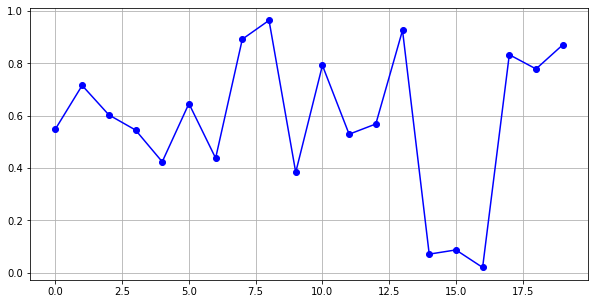

In [11]:
plt.figure(figsize=[10, 5]); # Set dimensions for figure
plt.plot(array, linestyle='-', marker='o', color='b')
plt.grid(True)
plt.show()

In [12]:
array.reshape((4,5,1))

array([[[0.5488135 ],
        [0.71518937],
        [0.60276338],
        [0.54488318],
        [0.4236548 ]],

       [[0.64589411],
        [0.43758721],
        [0.891773  ],
        [0.96366276],
        [0.38344152]],

       [[0.79172504],
        [0.52889492],
        [0.56804456],
        [0.92559664],
        [0.07103606]],

       [[0.0871293 ],
        [0.0202184 ],
        [0.83261985],
        [0.77815675],
        [0.87001215]]])

In [13]:
array.reshape((2,5,2))

array([[[0.5488135 , 0.71518937],
        [0.60276338, 0.54488318],
        [0.4236548 , 0.64589411],
        [0.43758721, 0.891773  ],
        [0.96366276, 0.38344152]],

       [[0.79172504, 0.52889492],
        [0.56804456, 0.92559664],
        [0.07103606, 0.0871293 ],
        [0.0202184 , 0.83261985],
        [0.77815675, 0.87001215]]])

In [14]:
np.random.seed(0)

# Example 1
array= np.random.random(20) #.astype(np.float32
x1=   array.reshape((1,20,1))
x1

array([[[0.5488135 ],
        [0.71518937],
        [0.60276338],
        [0.54488318],
        [0.4236548 ],
        [0.64589411],
        [0.43758721],
        [0.891773  ],
        [0.96366276],
        [0.38344152],
        [0.79172504],
        [0.52889492],
        [0.56804456],
        [0.92559664],
        [0.07103606],
        [0.0871293 ],
        [0.0202184 ],
        [0.83261985],
        [0.77815675],
        [0.87001215]]])

In [15]:

# Example 2
x2= array.reshape((4,5,1))
x2

array([[[0.5488135 ],
        [0.71518937],
        [0.60276338],
        [0.54488318],
        [0.4236548 ]],

       [[0.64589411],
        [0.43758721],
        [0.891773  ],
        [0.96366276],
        [0.38344152]],

       [[0.79172504],
        [0.52889492],
        [0.56804456],
        [0.92559664],
        [0.07103606]],

       [[0.0871293 ],
        [0.0202184 ],
        [0.83261985],
        [0.77815675],
        [0.87001215]]])

In [16]:

# Example 3
x3= array.reshape((2,5,2))
x3

array([[[0.5488135 , 0.71518937],
        [0.60276338, 0.54488318],
        [0.4236548 , 0.64589411],
        [0.43758721, 0.891773  ],
        [0.96366276, 0.38344152]],

       [[0.79172504, 0.52889492],
        [0.56804456, 0.92559664],
        [0.07103606, 0.0871293 ],
        [0.0202184 , 0.83261985],
        [0.77815675, 0.87001215]]])

* use numpy to store and manipulate image data. 
* We will use the Python Imaging library (PIL) to read and write data to standard file formats.
* 4 lines of pixels, each line of pixels contains 5 pixels, and each pixel contains 3 bytes (red, green, blue)
* The shape of the array is: height x width x 3.

In [17]:
#np.random.randint?

In [18]:
np.random.seed(0)

# IF it is image data:
# Create an RGB image that is 3 dimensional arrays of 8-bit unsigned integers.
width= 5
height= 4
RGB= 3
p= width * height * RGB
img_data= np.random.randint(low=100, high=256, size=p, dtype= np.uint8) # Generate values in (100,255)
img_data= img_data.reshape((height, width, RGB))
img_data

array([[[110, 227, 240],
        [147, 251, 217],
        [122, 133, 167],
        [178, 254, 182],
        [218, 225, 239]],

       [[203, 225, 109],
        [216, 208, 121],
        [181, 189, 202],
        [198, 136, 105],
        [212, 187, 158]],

       [[143, 176, 170],
        [160, 175, 232],
        [114, 188, 254],
        [240, 169, 158],
        [157, 141, 198]],

       [[166, 172, 222],
        [225, 139, 174],
        [187, 201, 235],
        [222, 188, 194],
        [207, 245, 181]]], dtype=uint8)

In [19]:
# this cell has no effect in Colab, need debugging ...
from PIL import Image
img= Image.fromarray(img_data)
img.show()


In [20]:
#
# 尚未成功，影像顯示在 Colab 上還需爬網研究一下
#

# for google colab use cv2_imshow instead
# change x, y, h ,w to the values you are happy with
#import cv2_imshow
#img = cv2.imread("lenna.png")
#crop_img = img[y:y+h, x:x+w]
#cv2_imshow(img)
#cv2.waitKey(0)

#import cv2 as cv 
#from google.colab.patches import cv2_imshow # for image display
#from PIL import Image
#cv2_imshow(img)



### [Learning Objective 3] Stock data

In [21]:
try:
  import yfinance as yf
except:
  !pip install yfinance

try:
  from yahoofinancials import YahooFinancials
except:
  !pip install yahoofinancials
  

     |████████████████████████████████| 6.3MB 18.4MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23455 sha256=7c92432b60c39c6448616f07abc4000cccb3b079135789500f9c89d5e75219c1
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-cp37-none-any.whl size=15192 sha256=da02fb511179cce0400eecb4400a02fbb14cd132652cc0328a143c94dbeaa284
  Stored in directory: /root/.cache/pip/wheels/d9/7e/cf/4977a8572d5247242a4b13018d1d36923024ba84236e0d28bc
Successfully built yahoofinancials


In [22]:
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials

all_data= yf.download( '^gspc',    #'AMZN', 
          start= '1991-01-01',#'2013-01-01', 
          end=  '2021-01-01',#'2019-12-31', 
          progress=False)
# AMZN = yf.download('AMZN') for all 
'''
all_data= AMZN[['Adj Close',
        'Open', 
        'High', 
        'Low', 
        'Close', 
        'Volume']].round(2)
'''
all_data # 7559 rows × 6 columns

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1991-01-02,330.200012,330.750000,326.450012,326.450012,326.450012,126280000
1991-01-03,326.459991,326.529999,321.899994,321.910004,321.910004,141450000
1991-01-04,321.910004,322.350006,318.869995,321.000000,321.000000,140820000
1991-01-07,320.970001,320.970001,315.440002,315.440002,315.440002,130610000
1991-01-08,315.440002,316.970001,313.790009,314.899994,314.899994,143390000
...,...,...,...,...,...,...
2020-12-24,3694.030029,3703.820068,3689.320068,3703.060059,3703.060059,1885090000
2020-12-28,3723.030029,3740.510010,3723.030029,3735.360107,3735.360107,3527460000
2020-12-29,3750.010010,3756.120117,3723.310059,3727.040039,3727.040039,3387030000


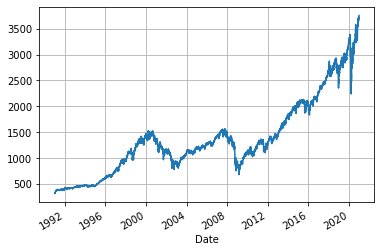

In [23]:
all_data['Close'].plot(grid=True)

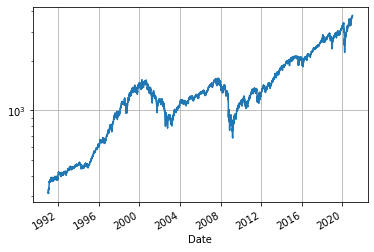

In [24]:
all_data['Close'].plot(grid=True,logy=True)

(7054, 505)

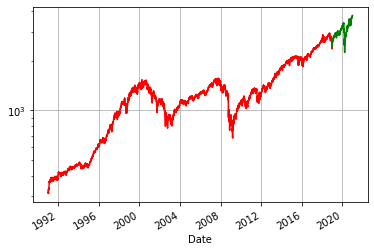

In [25]:
tr_data= all_data['Close'][:'2018']
ts_data= all_data['Close']['2019':]
tr_data.plot(c='r')
ts_data.plot(c='g', grid=True, logy=True)
tr_data.size, ts_data.size 

In [26]:
tr_days= (tr_data.index[-1]-tr_data.index[0]).days
ts_days= (ts_data.index[-1]-ts_data.index[0]).days

tr_years= tr_days/365
ts_years= ts_days/365
tr_days, ts_days, tr_years, ts_years

(10225, 729, 28.013698630136986, 1.9972602739726026)

In [27]:
print(f"{tr_data.size} data points in the training data")
print(f"{ts_data.size} data points in the test data")



7054 data points in the training data
505 data points in the test data


## [Learning objective 4] Create the training and test data for RNN/LSTM

In [28]:
def ts_train_test( #all_data, 
          time_steps= 10, 
          for_periods= 3):
    '''
    input: 
      data: dataframe with dates and price data
    output:
      X_train, y_train: data from 2013/1/1-2018/12/31
      X_test:  data from 2019 -
      sc:      insantiated MinMaxScaler object fit to the training data
    '''
    # create training and test set
    #ts_train = all_data[:'2018'].iloc[:,0:1].values
    #ts_test  = all_data['2019':].iloc[:,0:1].values

    ts_train= tr_data.values.reshape(-1,1)
    ts_test=  ts_data.values.reshape(-1,1)

    ts_train_len = len(ts_train)
    ts_test_len = len(ts_test)

    # create training data of s samples and t time steps
    X_train = []
    y_train = []
    #y_train_stacked = []
    for i in range(time_steps,ts_train_len-for_periods+1): 
        X_train.append(ts_train[i-time_steps:i,0])
        y_train.append(ts_train[i:i+for_periods,0])
    X_train, y_train = np.array(X_train), np.array(y_train)

    # Reshaping X_train for efficient modelling
    X_train= np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

    #inputs= pd.concat((all_data["Adj Close"][:'2018'], 
    #          all_data["Adj Close"]['2019':]),
    #        axis=0).values
    
    inputs= pd.concat((tr_data, 
              ts_data),
            axis=0).values

    inputs= inputs[len(inputs)-len(ts_test) - time_steps:]
    inputs= inputs.reshape(-1,1)

    # Preparing X_test
    X_test= []
    for i in range(time_steps,ts_test_len+time_steps-for_periods):
        X_test.append(inputs[i-time_steps:i,0])
        
    X_test= np.array(X_test)
    X_test= np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

    return X_train, y_train , X_test

X_train, y_train, X_test= ts_train_test() #all_data, 5, 2)
X_train.shape, y_train.shape, X_test.shape

((7042, 10, 1), (7042, 3), (502, 10, 1))

In [29]:
# Make the 3-D shape to a data frame so we can see: 
X_train_see= pd.DataFrame(np.reshape(X_train, 
                   X_train.shape[0:2] #(X_train.shape[0],X_train.shape[1])
                   ))
y_train_see= pd.DataFrame(y_train)
pd.concat([X_train_see,y_train_see], axis=1)

,0,1,2,3,4,5,6,7,8,9,0,1,2
0,326.450012,321.910004,321.000000,315.440002,314.899994,311.489990,314.529999,315.230011,312.489990,313.730011,316.170013,327.970001,332.230011
1,321.910004,321.000000,315.440002,314.899994,311.489990,314.529999,315.230011,312.489990,313.730011,316.170013,327.970001,332.230011,331.059998
2,321.000000,315.440002,314.899994,311.489990,314.529999,315.230011,312.489990,313.730011,316.170013,327.970001,332.230011,331.059998,328.309998
3,315.440002,314.899994,311.489990,314.529999,315.230011,312.489990,313.730011,316.170013,327.970001,332.230011,331.059998,328.309998,330.209991
4,314.899994,311.489990,314.529999,315.230011,312.489990,313.730011,316.170013,327.970001,332.230011,331.059998,328.309998,330.209991,334.779999
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,2695.949951,2633.080078,2637.719971,2636.780029,2651.070068,2650.540039,2599.949951,2545.939941,2546.159912,2506.959961,2467.419922,2416.620117,2351.100098
7038,2633.080078,2637.719971,2636.780029,2651.070068,2650.540039,2599.949951,2545.939941,2546.159912,2506.959961,2467.419922,2416.620117,2351.100098,2467.699951
7039,2637.719971,2636.780029,2651.070068,2650.540039,2599.949951,2545.939941,2546.159912,2506.959961,2467.419922,2416.620117,2351.100098,2467.699951,2488.830078
7040,2636.780029,2651.070068,2650.540039,2599.949951,2545.939941,2546.159912,2506.959961,2467.419922,2416.620117,2351.100098,2467.699951,2488.830078,2485.739990


In [30]:
# Make the 3-D shape to a data frame so we can see: 
X_test_see= pd.DataFrame(np.reshape(X_test, 
                  X_test.shape[0:2] #(X_test.shape[0],X_test.shape[1])
                  ))
pd.DataFrame(X_test_see)

,0,1,2,3,4,5,6,7,8,9
0,2545.939941,2546.159912,2506.959961,2467.419922,2416.620117,2351.100098,2467.699951,2488.830078,2485.739990,2506.850098
1,2546.159912,2506.959961,2467.419922,2416.620117,2351.100098,2467.699951,2488.830078,2485.739990,2506.850098,2510.030029
2,2506.959961,2467.419922,2416.620117,2351.100098,2467.699951,2488.830078,2485.739990,2506.850098,2510.030029,2447.889893
3,2467.419922,2416.620117,2351.100098,2467.699951,2488.830078,2485.739990,2506.850098,2510.030029,2447.889893,2531.939941
4,2416.620117,2351.100098,2467.699951,2488.830078,2485.739990,2506.850098,2510.030029,2447.889893,2531.939941,2549.689941
...,...,...,...,...,...,...,...,...,...,...
497,3691.959961,3702.250000,3672.820068,3668.100098,3663.459961,3647.489990,3694.620117,3701.169922,3722.479980,3709.409912
498,3702.250000,3672.820068,3668.100098,3663.459961,3647.489990,3694.620117,3701.169922,3722.479980,3709.409912,3694.919922
499,3672.820068,3668.100098,3663.459961,3647.489990,3694.620117,3701.169922,3722.479980,3709.409912,3694.919922,3687.260010
500,3668.100098,3663.459961,3647.489990,3694.620117,3701.169922,3722.479980,3709.409912,3694.919922,3687.260010,3690.010010


In [31]:
print(f"{X_train.shape} samples in the training data")
print(f"{y_train.shape} samples in the training label")
print(f"{X_test.shape} samples in the test data")

(7042, 10, 1) samples in the training data
(7042, 3) samples in the training label
(502, 10, 1) samples in the test data


## [Learning objective 5] Run a simple RNN model

In [32]:
def simple_rnn_model(X_train, y_train, X_test, for_periods= 3):
    '''
    create single layer rnn model trained on X_train and y_train
    and make predictions on the X_test data
    '''
    # create a model
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN
    
    my_rnn_model = Sequential()
    my_rnn_model.add(SimpleRNN(32, return_sequences=True))
    #my_rnn_model.add(SimpleRNN(32, return_sequences=True))
    #my_rnn_model.add(SimpleRNN(32, return_sequences=True))
    my_rnn_model.add(SimpleRNN(32))
    my_rnn_model.add(Dense(for_periods)) # The time step of the output

    my_rnn_model.compile(optimizer='rmsprop', 
               loss='mean_squared_error')

    # fit the RNN model
    my_rnn_model.fit(X_train, y_train, 
            epochs=10, 
            batch_size=150, 
            verbose=0)

    # Finalizing predictions
    rnn_predictions= my_rnn_model.predict(X_test)

    return my_rnn_model, rnn_predictions

(my_rnn_model, 
rnn_predictions)= simple_rnn_model(X_train, y_train, X_test)

my_rnn_model, rnn_predictions

(<keras.engine.sequential.Sequential at 0x7fbec891c310>,
 array([[20.32158 , 18.612843, 16.775862],
        [20.32158 , 18.612843, 16.775862],
        [20.32158 , 18.612843, 16.775862],
        ...,
        [20.32158 , 18.612843, 16.775862],
        [20.32158 , 18.612843, 16.775862],
        [20.32158 , 18.612843, 16.775862]], dtype=float32))

(9380198.0,                    real       pred
 Date                              
 2019-01-07  2549.689941  20.321581
 2019-01-08  2574.409912  20.321581
 2019-01-09  2584.959961  20.321581
 2019-01-10  2596.639893  20.321581
 2019-01-11  2596.260010  20.321581
 ...                 ...        ...
 2020-12-24  3703.060059  20.321581
 2020-12-28  3735.360107  20.321581
 2020-12-29  3727.040039  20.321581
 2020-12-30  3732.040039  20.321581
 2020-12-31  3756.070068  20.321581
 
 [502 rows x 2 columns])

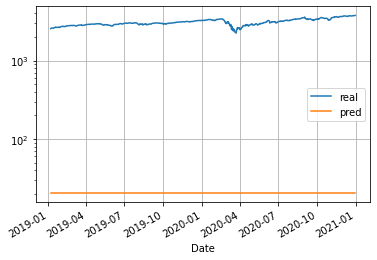

In [33]:
def actual_pred_plot(preds):
    actual_pred= pd.DataFrame()#columns= ['Adj. Close', 'prediction'])
    actual_pred['real']= ts_data[-len(preds):] #all_data.loc['2019':,'Adj Close'][0:len(preds)]
    actual_pred['pred']= preds[:,0]

    from keras.metrics import MeanSquaredError
    m = MeanSquaredError()
    m.update_state(np.array(actual_pred['real']),
            np.array(actual_pred['pred']))
    actual_pred.plot(grid=True, logy=True)
    return (m.result().numpy(), actual_pred)
    
actual_pred_plot(rnn_predictions)  

## [Learning objective 6] RNN/LTSM requires normalized input data

In [ ]:
def ts_train_test_normalize( #all_data, 
               time_steps=10, 
               for_periods=3):
    '''
    input: 
      data: dataframe with dates and price data
      time_steps: 向後回朔日期
      for_periods: 向前預測日期
    output:
      X_train, y_train: data from 2013/1/1-2018/12/31
      X_test:  data from 2019 -
      sc:      insantiated MinMaxScaler object fit to the training data
    '''
    # create training and test set
    #ts_train =  all_data[:'2018'].iloc[:,0:1].values #tr_data.values #
    #ts_test  =  all_data['2019':].iloc[:,0:1].values #ts_data.values #
    
    ts_train= tr_data.values.reshape(-1,1)
    ts_test=  ts_data.values.reshape(-1,1)

    ts_train_len = len(ts_train)
    ts_test_len = len(ts_test)

    # scale the data
    from sklearn.preprocessing import MinMaxScaler
    sc= MinMaxScaler(feature_range=(0,1))

    ts_train_scaled= sc.fit_transform(ts_train)

    # create training data of s samples and t time steps
    X_train= []
    y_train= []
    y_train_stacked= []
    for i in range(time_steps,ts_train_len-for_periods+1): 
        X_train.append(ts_train_scaled[i-time_steps:i,0])
        y_train.append(ts_train_scaled[i:i+for_periods,0])
    X_train, y_train = np.array(X_train), np.array(y_train)

    # Reshaping X_train for efficient modelling
    X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

    #inputs = pd.concat((all_data["Adj Close"][:'2018'], #ts_train, #
    #           all_data["Adj Close"]['2019':] #ts_test  #
    #           ),axis=0).values
    
    inputs= pd.concat((tr_data, 
              ts_data),
            axis=0).values

    inputs = inputs[len(inputs)-len(ts_test) - time_steps:]
    inputs = inputs.reshape(-1,1)
    inputs  = sc.transform(inputs)

    # Preparing X_test
    X_test = []
    for i in range(time_steps,ts_test_len+time_steps-for_periods):
        X_test.append(inputs[i-time_steps:i,0])
        
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

    return X_train, y_train , X_test, sc

X_train, y_train, X_test, sc= ts_train_test_normalize() #all_data)
X_train, y_train, X_test, sc

(array([[2546.2295, 2547.075 , 2543.017 ],
        [2544.889 , 2560.2336, 2540.4143],
        [2480.1577, 2479.5835, 2464.8936],
        ...,
        [3602.4324, 3578.7224, 3539.4438],
        [3600.912 , 3579.232 , 3544.6333],
        [3613.304 , 3586.431 , 3554.6575]], dtype=float32),
 (8063.935,                    real         pred
  Date                                
  2019-01-07  2549.689941  2546.229492
  2019-01-08  2574.409912  2544.888916
  2019-01-09  2584.959961  2480.157715
  2019-01-10  2596.639893  2559.948486
  2019-01-11  2596.260010  2563.025391
  ...                 ...          ...
  2020-12-24  3703.060059  3619.348877
  2020-12-28  3735.360107  3606.228271
  2020-12-29  3727.040039  3602.432373
  2020-12-30  3732.040039  3600.912109
  2020-12-31  3756.070068  3613.303955
  
  [502 rows x 2 columns]))

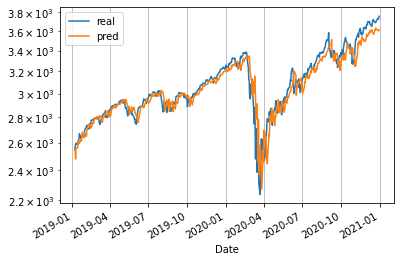

In [35]:

def simple_rnn_model(X_train, y_train, X_test, sc, for_periods= 3):
    '''
    create single layer rnn model trained on X_train and y_train
    and make predictions on the X_test data
    '''
    # create a model
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN
    
    my_rnn_model = Sequential()
    my_rnn_model.add(SimpleRNN(32, return_sequences=True))
    #my_rnn_model.add(SimpleRNN(32, return_sequences=True))
    #my_rnn_model.add(SimpleRNN(32, return_sequences=True))
    my_rnn_model.add(SimpleRNN(32))
    my_rnn_model.add(Dense(for_periods)) # The time step of the output

    my_rnn_model.compile(optimizer='rmsprop', 
              loss='mean_squared_error')

    # fit the RNN model
    my_rnn_model.fit(X_train, y_train, epochs=100, batch_size=150, verbose=0)

    # Finalizing predictions
    rnn_predictions= my_rnn_model.predict(X_test)
    from sklearn.preprocessing import MinMaxScaler
    rnn_predictions= sc.inverse_transform(rnn_predictions)

    return my_rnn_model, rnn_predictions


my_rnn_model, rnn_predictions_2= simple_rnn_model(X_train, y_train, X_test, sc)
rnn_predictions_2, actual_pred_plot(rnn_predictions_2)



In [36]:
x= X_test
y= my_rnn_model(x) #.predict(x)

y= sc.inverse_transform(y)
x, y

# ry: 這裡所用的 X_test 其實有點怪怪的。
# 就 RNN 而言，input 應是最初的 1個 window，
# 稱為初始 window，(eg. 10個資料點)
# 然後產生的 output (eg. 3個資料點)接到初始 window 的後面，
# 砍掉初始window的前面(3個資料點)，形成新的 input
# 如此一直重複至無窮遠的未來....
#
#
# x= X_test[0:1] # 僅拿1個window
# #以 x 為種子，運用 rnn_model() 不斷滾出整條output yL[]
# yL= [x]
# while True:
#   y= my_rnn_model(x)
#   x[0:7]=x[3:]
#   x[7:]=y
#   yL +=[y]
#
# 以上想法尚未 implement...
# 可以想見的是預測誤差會逐步累積，越遠的將來誤差越大....
# 好處是，只要提供初始種子就可長成1棵大樹
# 雖然大樹可能越長越歪!!
#

(array([[[0.85308444],
         [0.85316842],
         [0.83820238],
         ...,
         [0.83128062],
         [0.83010087],
         [0.83816043]],
 
        [[0.85316842],
         [0.83820238],
         [0.8231065 ],
         ...,
         [0.83010087],
         [0.83816043],
         [0.83937449]],
 
        [[0.83820238],
         [0.8231065 ],
         [0.80371178],
         ...,
         [0.83816043],
         [0.83937449],
         [0.81565018]],
 
        ...,
 
        [[1.28331287],
         [1.28151084],
         [1.2797393 ],
         ...,
         [1.2972824 ],
         [1.29175031],
         [1.28882585]],
 
        [[1.28151084],
         [1.2797393 ],
         [1.27364217],
         ...,
         [1.29175031],
         [1.28882585],
         [1.28987577]],
 
        [[1.2797393 ],
         [1.27364217],
         [1.29163585],
         ...,
         [1.28882585],
         [1.28987577],
         [1.29485811]]]), array([[2546.22940857, 2547.07495483, 2543.01708217],
 

In [37]:
my_rnn_model(x)


<tf.Tensor: shape=(502, 3), dtype=float32, numpy=
array([[0.85319495, 0.8535178 , 0.8519685 ],
       [0.8526832 , 0.8585416 , 0.85097486],
       [0.8279697 , 0.82775044, 0.822142  ],
       ...,
       [1.2564397 , 1.2473875 , 1.2323915 ],
       [1.2558593 , 1.2475821 , 1.2343727 ],
       [1.2605903 , 1.2503306 , 1.2381998 ]], dtype=float32)>

## [Learning objective 7] LSTM

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


(34788.473,                    real         pred
 Date                                
 2019-01-07  2549.689941  2463.150635
 2019-01-08  2574.409912  2460.140625
 2019-01-09  2584.959961  2455.550049
 2019-01-10  2596.639893  2457.074463
 2019-01-11  2596.260010  2464.147705
 ...                 ...          ...
 2020-12-24  3703.060059  3378.623047
 2020-12-28  3735.360107  3379.679199
 2020-12-29  3727.040039  3379.720459
 2020-12-30  3732.040039  3381.117432
 2020-12-31  3756.070068  3383.004150
 
 [502 rows x 2 columns])

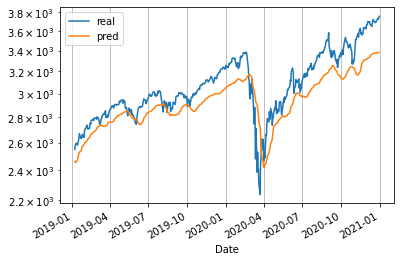

In [39]:
def LSTM_model(X_train, y_train, X_test, sc, for_periods= 3):
    # create a model
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN, GRU, LSTM
    from keras.optimizers import SGD
    
    # The LSTM architecture
    my_LSTM_model = Sequential()
    my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    #my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    #my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    my_LSTM_model.add(LSTM(units=50, activation='tanh'))
    my_LSTM_model.add(Dense(units= for_periods))

    # Compiling
    my_LSTM_model.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
    # Fitting to the training set
    my_LSTM_model.fit(X_train,y_train,epochs=50,batch_size=150, verbose=0)

    LSTM_prediction = my_LSTM_model.predict(X_test)
    LSTM_prediction = sc.inverse_transform(LSTM_prediction)

    return my_LSTM_model, LSTM_prediction

my_LSTM_model, LSTM_prediction = LSTM_model(X_train, y_train, X_test, sc)
LSTM_prediction[1:10]
actual_pred_plot(LSTM_prediction)   

## [Learning objective 8] LSTM Regularization

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


(array([[2470.007 , 2466.9526, 2460.064 ],
        [2466.558 , 2462.2764, 2455.2488],
        [2461.996 , 2456.5513, 2449.533 ],
        ...,
        [3365.3572, 3343.6196, 3316.5444],
        [3366.867 , 3345.0896, 3318.0283],
        [3368.784 , 3347.0642, 3319.9626]], dtype=float32),
 (35477.723,                    real         pred
  Date                                
  2019-01-07  2549.689941  2470.007080
  2019-01-08  2574.409912  2466.558105
  2019-01-09  2584.959961  2461.996094
  2019-01-10  2596.639893  2463.457031
  2019-01-11  2596.260010  2470.385254
  ...                 ...          ...
  2020-12-24  3703.060059  3364.319824
  2020-12-28  3735.360107  3365.261963
  2020-12-29  3727.040039  3365.357178
  2020-12-30  3732.040039  3366.866943
  2020-12-31  3756.070068  3368.783936
  
  [502 rows x 2 columns]))

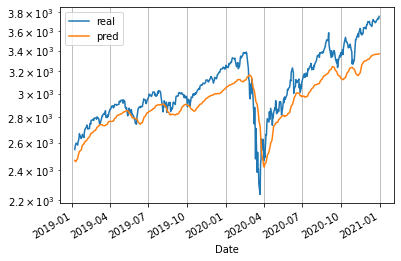

In [40]:
def LSTM_model_regularization(X_train, y_train, X_test, sc, for_periods= 3):
    # create a model
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN, GRU, LSTM
    from keras.optimizers import SGD
    
    # The LSTM architecture
    my_LSTM_model = Sequential()
    my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    #my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    #my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    my_LSTM_model.add(LSTM(units=50, activation='tanh'))
    my_LSTM_model.add(Dense(units= for_periods))

    # Compiling
    my_LSTM_model.compile(optimizer=SGD(lr=0.01, 
                      decay=1e-7, 
                      momentum=0.9, 
                      nesterov=False),
               loss='mean_squared_error')
    # Fitting to the training set
    my_LSTM_model.fit(X_train,y_train,epochs=50,batch_size=150, verbose=0)

    LSTM_prediction = my_LSTM_model.predict(X_test)
    LSTM_prediction = sc.inverse_transform(LSTM_prediction)

    return my_LSTM_model, LSTM_prediction

my_LSTM_model, LSTM_prediction= LSTM_model_regularization(X_train, y_train, X_test, sc)
LSTM_prediction, actual_pred_plot(LSTM_prediction)  

## [Learning objective 9] GRU

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


(array([[2459.4568, 2454.1282, 2459.0242],
        [2469.657 , 2463.7505, 2468.7922],
        [2468.5781, 2461.1946, 2465.6858],
        ...,
        [3567.466 , 3501.7825, 3540.982 ],
        [3566.3074, 3500.5188, 3539.7732],
        [3566.951 , 3501.3333, 3540.8005]], dtype=float32),
 (14334.352,                    real         pred
  Date                                
  2019-01-07  2549.689941  2459.456787
  2019-01-08  2574.409912  2469.656982
  2019-01-09  2584.959961  2468.578125
  2019-01-10  2596.639893  2476.502930
  2019-01-11  2596.260010  2489.765625
  ...                 ...          ...
  2020-12-24  3703.060059  3565.677734
  2020-12-28  3735.360107  3568.118408
  2020-12-29  3727.040039  3567.466064
  2020-12-30  3732.040039  3566.307373
  2020-12-31  3756.070068  3566.950928
  
  [502 rows x 2 columns]))

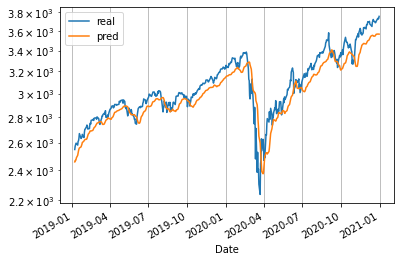

In [41]:
def GRU_model(X_train, y_train, X_test, sc, for_periods= 3):
    # create a model
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN, GRU
    from keras.optimizers import SGD
    
    # The GRU architecture
    my_GRU_model = Sequential()
    # First GRU layer with Dropout regularisation
    my_GRU_model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    #my_GRU_model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    #my_GRU_model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    my_GRU_model.add(GRU(units=50, activation='tanh'))
    my_GRU_model.add(Dense(units= for_periods))

    # Compiling the RNN
    my_GRU_model.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
    # Fitting to the training set
    my_GRU_model.fit(X_train,y_train,epochs=50,batch_size=150, verbose=0)

    GRU_prediction = my_GRU_model.predict(X_test)
    GRU_prediction = sc.inverse_transform(GRU_prediction)

    return my_GRU_model, GRU_prediction

my_GRU_model, GRU_prediction = GRU_model(X_train, y_train, X_test, sc)
GRU_prediction, actual_pred_plot(GRU_prediction)  

## [Learning objective 10] GRU Regularization

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


(14334.352,                    real         pred
 Date                                
 2019-01-07  2549.689941  2459.456787
 2019-01-08  2574.409912  2469.656982
 2019-01-09  2584.959961  2468.578125
 2019-01-10  2596.639893  2476.502930
 2019-01-11  2596.260010  2489.765625
 ...                 ...          ...
 2020-12-24  3703.060059  3565.677734
 2020-12-28  3735.360107  3568.118408
 2020-12-29  3727.040039  3567.466064
 2020-12-30  3732.040039  3566.307373
 2020-12-31  3756.070068  3566.950928
 
 [502 rows x 2 columns])

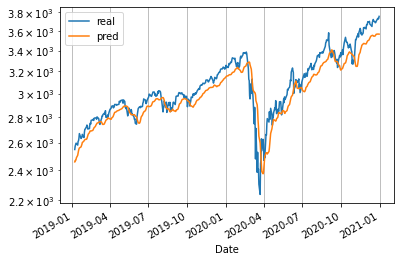

In [42]:
def GRU_model_regularization(X_train, y_train, X_test, sc, for_periods= 3):
    '''
    create GRU model trained on X_train and y_train
    and make predictions on the X_test data
    '''
    # create a model
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN, GRU
    from keras.optimizers import SGD
    from keras.layers import Dropout
    
    # The GRU architecture
    my_GRU_model = Sequential()
    # First GRU layer with Dropout regularisation
    my_GRU_model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    my_GRU_model.add(Dropout(0.2))
    # Second GRU layer
    my_GRU_model.add(GRU(units=50, return_sequences=True, activation='tanh'))
    my_GRU_model.add(Dropout(0.2))
    
    # Third GRU layer
    my_GRU_model.add(GRU(units=50, return_sequences=True, activation='tanh'))
    my_GRU_model.add(Dropout(0.2))
    # Fourth GRU layer
    my_GRU_model.add(GRU(units=50, activation='tanh'))
    my_GRU_model.add(Dropout(0.2))
    # The output layer
    my_GRU_model.add(Dense(units= for_periods))
    # Compiling the RNN
    my_GRU_model.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
    # Fitting to the training set
    my_GRU_model.fit(X_train,y_train,epochs=50,batch_size=150, verbose=0)

    GRU_predictions = my_GRU_model.predict(X_test)
    GRU_predictions = sc.inverse_transform(GRU_predictions)

    return my_GRU_model, GRU_predictions

my_GRU_model, GRU_predictions = GRU_model_regularization(X_train, y_train, X_test, sc)
GRU_predictions
actual_pred_plot(GRU_prediction)  

In [43]:
preds= rnn_predictions_2

x= pd.DataFrame()#columns= ['Adj. Close', 'prediction'])
x['real']= ts_data[-len(preds):] #all_data.loc['2019':,'Adj Close'][0:len(preds)]
x['rnn']= preds[:,0]

x['lstm']= LSTM_prediction[:,0]
x['gru']= GRU_prediction[:,0]

x

,real,rnn,lstm,gru
Date,,,,
2019-01-07,2549.689941,2546.229492,2470.007080,2459.456787
2019-01-08,2574.409912,2544.888916,2466.558105,2469.656982
2019-01-09,2584.959961,2480.157715,2461.996094,2468.578125
2019-01-10,2596.639893,2559.948486,2463.457031,2476.502930
2019-01-11,2596.260010,2563.025391,2470.385254,2489.765625
...,...,...,...,...
2020-12-24,3703.060059,3619.348877,3364.319824,3565.677734
2020-12-28,3735.360107,3606.228271,3365.261963,3568.118408
2020-12-29,3727.040039,3602.432373,3365.357178,3567.466064


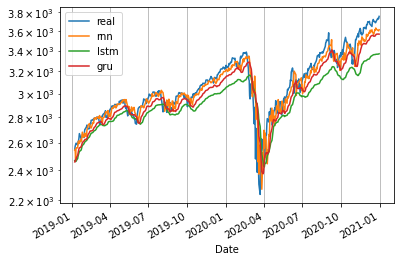

In [44]:
x.plot(grid=True,logy=True)

In [45]:
x.corr()

,real,rnn,lstm,gru
real,1.000000,0.954651,0.917247,0.944027
rnn,0.954651,1.000000,0.964193,0.983835
lstm,0.917247,0.964193,1.000000,0.991994
gru,0.944027,0.983835,0.991994,1.000000


In [ ]:
# 如果不用 RNN/LSTM/GRU，只用 moving average 呢？
x

In [46]:
for w in [10, 20, 50, 100]:
  x[f'ma{w}']=x['real'].rolling(window=w).mean()
x

,real,rnn,lstm,gru,ma10,ma20,ma50,ma100
Date,,,,,,,,
2019-01-07,2549.689941,2546.229492,2470.007080,2459.456787,NaN,NaN,NaN,NaN
2019-01-08,2574.409912,2544.888916,2466.558105,2469.656982,NaN,NaN,NaN,NaN
2019-01-09,2584.959961,2480.157715,2461.996094,2468.578125,NaN,NaN,NaN,NaN
2019-01-10,2596.639893,2559.948486,2463.457031,2476.502930,NaN,NaN,NaN,NaN
2019-01-11,2596.260010,2563.025391,2470.385254,2489.765625,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2020-12-24,3703.060059,3619.348877,3364.319824,3565.677734,3691.387988,3680.314502,3563.210796,3478.382000
2020-12-28,3735.360107,3606.228271,3365.261963,3568.118408,3698.578003,3685.165002,3568.251196,3482.457900
2020-12-29,3727.040039,3602.432373,3365.357178,3567.466064,3706.533008,3690.435510,3573.115796,3486.236702


In [47]:
x.corr()

,real,rnn,lstm,gru,ma10,ma20,ma50,ma100
real,1.000000,0.954651,0.917247,0.944027,0.970308,0.924249,0.794418,0.651499
rnn,0.954651,1.000000,0.964193,0.983835,0.987624,0.961957,0.829675,0.667581
lstm,0.917247,0.964193,1.000000,0.991994,0.977964,0.991510,0.872837,0.691728
gru,0.944027,0.983835,0.991994,1.000000,0.993993,0.986498,0.864860,0.700026
ma10,0.970308,0.987624,0.977964,0.993993,1.000000,0.978912,0.855137,0.699144
ma20,0.924249,0.961957,0.991510,0.986498,0.978912,1.000000,0.912766,0.748442
ma50,0.794418,0.829675,0.872837,0.864860,0.855137,0.912766,1.000000,0.877424
ma100,0.651499,0.667581,0.691728,0.700026,0.699144,0.748442,0.877424,1.000000


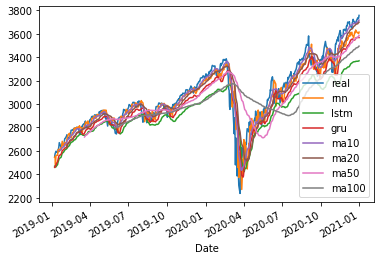

In [48]:
x.plot()

In [49]:
for w in [10, 20, 50, 100]:
  x[f'mC{w}']=x['real'].rolling(window=w, center=True).mean()
x.corr()


,real,rnn,lstm,gru,ma10,ma20,ma50,ma100,mC10,mC20,mC50,mC100
real,1.000000,0.954651,0.917247,0.944027,0.970308,0.924249,0.794418,0.651499,0.990737,0.982693,0.926297,0.791714
rnn,0.954651,1.000000,0.964193,0.983835,0.987624,0.961957,0.829675,0.667581,0.973030,0.968332,0.917302,0.777283
lstm,0.917247,0.964193,1.000000,0.991994,0.977964,0.991510,0.872837,0.691728,0.933523,0.940406,0.913844,0.772757
gru,0.944027,0.983835,0.991994,1.000000,0.993993,0.986498,0.864860,0.700026,0.961667,0.964994,0.925539,0.787439
ma10,0.970308,0.987624,0.977964,0.993993,1.000000,0.978912,0.855137,0.699144,0.983715,0.984127,0.940201,0.804814
ma20,0.924249,0.961957,0.991510,0.986498,0.978912,1.000000,0.912766,0.748442,0.940474,0.947873,0.938663,0.817102
ma50,0.794418,0.829675,0.872837,0.864860,0.855137,0.912766,1.000000,0.877424,0.805232,0.810453,0.831282,0.822347
ma100,0.651499,0.667581,0.691728,0.700026,0.699144,0.748442,0.877424,1.000000,0.649565,0.639813,0.611501,0.557644
mC10,0.990737,0.973030,0.933523,0.961667,0.983715,0.940474,0.805232,0.649565,1.000000,0.995826,0.947112,0.813542
mC20,0.982693,0.968332,0.940406,0.964994,0.984127,0.947873,0.810453,0.639813,0.995826,1.000000,0.967428,0.837515


In [50]:
x.corr()['real'].sort_values(ascending=False)


real     1.000000
mC10     0.990737
mC20     0.982693
ma10     0.970308
rnn      0.954651
gru      0.944027
mC50     0.926297
ma20     0.924249
lstm     0.917247
ma50     0.794418
mC100    0.791714
ma100    0.651499
Name: real, dtype: float64

In [51]:
'''
real     1.000000
mC10     0.990788
mC20     0.982726
ma10     0.970436
rnn      0.969485
gru      0.960465
lstm     0.952220
mC50     0.926622
ma20     0.924500
ma50     0.794824
mC100    0.792111
ma100    0.653097
Name: real, dtype: float64
'''
# 與 'real' 的相關係數最高的前3名分別為 mC10, mC20, ma10
# 'rnn', 'gru', 'lstm' 排在其後
# 那麼 若用 x.corr() 來衡量 演算法達成效果的優缺點，
# 這些 deep learning 優於傳統方法之處在哪裡？ 

'\nreal     1.000000\nmC10     0.990788\nmC20     0.982726\nma10     0.970436\nrnn      0.969485\ngru      0.960465\nlstm     0.952220\nmC50     0.926622\nma20     0.924500\nma50     0.794824\nmC100    0.792111\nma100    0.653097\nName: real, dtype: float64\n'